In [1]:
import pickle
data = pickle.load(open('lp-data-moods.p', 'rb'))
data.drop(['tempo', 'loudness', 'duration'], inplace=True, axis=1)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
data.columns

Index([u'name', u'album', u'mood', u'energy', u'valence'], dtype='object')

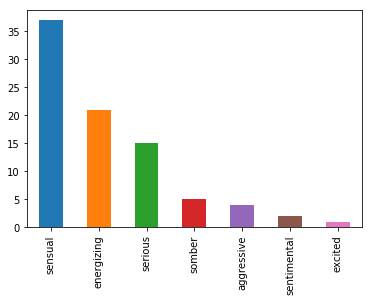

In [2]:
data.mood.value_counts().plot(kind='bar')

In [3]:
mood_positiveness = {
    'peaceful' : 1, 'upbeat' : 1, 'excited': 1,
    'sentimental' : 0, 'sensual' : 0, 'energizing' : 0,
    'somber' : -1, 'serious': -1, 'aggressive' : -1
}
mood_energeticness = {
    'excited' : 1, 'energizing' : 1, 'aggressive': 1,
    'upbeat' : 0, 'sensual' : 0, 'serious' : 0,
    'peaceful' : -1, 'sentimental': -1, 'somber' : -1
}
data['positiveness'] = data.mood.apply(lambda a: mood_positiveness[a])  
data['energeticness'] = data.mood.apply(lambda a: mood_energeticness[a])  

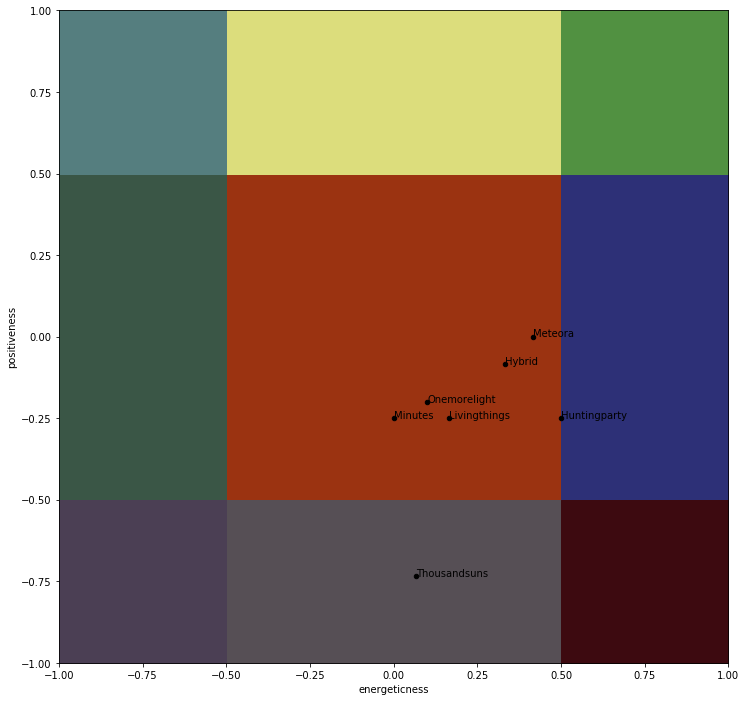

In [4]:
import numpy as np
plt.rcParams['figure.figsize'] = (12,12)
b = data.groupby('album')['positiveness', 'energeticness'].mean()
fig, ax = plt.subplots()
plt.xlim(-1,1)
plt.ylim(-1,1)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

#sensual
plt.fill_between(np.linspace(-0.5,0.5,200), 0.5, -0.5, color='#9b3311')
#plt.text(-0.17, 0.0, 'Sensual', font)
#energizing
plt.fill_between(np.linspace(0.5,1,200), 0.5, -0.5, color='#2d3077')  
#sentimental
plt.fill_between(np.linspace(-0.5,-1,200), 0.5, -0.5, color='#3a5646')  

#upbeat
plt.fill_between(np.linspace(-0.5,0.5,200), 0.5, 1.0, color='#dcdd7c')    
#excited
plt.fill_between(np.linspace(0.5,1,200), 0.5, 1.0, color='#519141') 
#peaceful
plt.fill_between(np.linspace(-0.5,-1,200), 0.5, 1.0, color='#557e7f')  

#serious
plt.fill_between(np.linspace(-0.5,0.5,200), -0.5, -1.0, color = '#564f55')
#aggressive
plt.fill_between(np.linspace(0.5,1,200), -0.5, -1.0, color='#3d0a10')  
#somber
plt.fill_between(np.linspace(-0.5,-1,200), -0.5, -1.0, color='#4b3f54')  

b.plot('energeticness', 'positiveness', kind='scatter', ax=ax, color='k')
for k, v in b.iterrows():
    ax.text(v['energeticness'], v['positiveness'], k)

In [5]:
data.groupby('album')['mood'].agg(lambda x: x.value_counts().index[0])

album
Huntingparty    energizing
Hybrid             sensual
Livingthings       sensual
Meteora            sensual
Minutes            sensual
Onemorelight       sensual
Thousandsuns       serious
Name: mood, dtype: object